In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
import os
cwd = os.getcwd()

NOTEBOOK_DIR = os.path.dirname(cwd)
ROOT = os.path.dirname(os.path.dirname(os.path.dirname(NOTEBOOK_DIR)))

FIGURES_DIR = os.path.join(ROOT, 'figures/abc_parameterizations/training/mnist')
# CONFIG_PATH = os.path.join(ROOT, 'pytorch/configs/abc_parameterizations/fc_abc.yaml')

In [4]:
import sys
sys.path.append(ROOT)

In [5]:
import torch
import pickle

from utils.plot.abc_parameterizations.results import *



from utils.tools import load_pickle

from utils.tools import read_yaml, set_random_seeds
from utils.plot.abc_parameterizations.initializations import *
from utils.plot.abc_parameterizations.one_d_functions import *
from pytorch.configs.base import BaseConfig
from pytorch.configs.model import ModelConfig
from pytorch.models.abc_params.fully_connected import ip, muP, ipllr
from pytorch.models.abc_params.fully_connected.standard_fc_ip import StandardFCIP

## Set variables

In [6]:
L = 6
WIDTH = 1024
BASE_LR = 0.01
BATCH_SIZE = 512
BIAS = False
N_TRIALS = 5

FONTSIZE = 12
FIGSIZE = (10, 6)

ACT_KEY_TO_NAME = {'relu': 'ReLU',
                   'gelu': 'GeLU',
                   'elu': 'ELU',
                   'tanh': 'tanh'}


experiments_dir = os.path.join(ROOT, 'experiments')
base_experiment = 'fc_ipllr_mnist'

## Process results

In [8]:
results = dict()
for activation in ACT_KEY_TO_NAME.keys():
    results[activation] = get_trial_results([L], [WIDTH], N_TRIALS, experiments_dir, base_experiment, activation, 
                                            BASE_LR, BATCH_SIZE, BIAS)

In [9]:
epoch_res = dict()
step_res = dict()
for activation in ACT_KEY_TO_NAME.keys():
    epoch_res_, step_res_ = get_epoch_step_results_from_trials(results[activation], 
                                                               pop_keys=('lrs', 'all_outputs', 'all_losses'))
    epoch_res[activation] = epoch_res_
    step_res[activation] = step_res_

## Plots

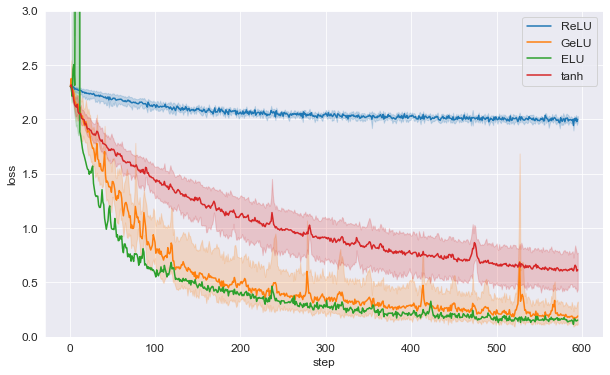

In [10]:
plt.figure(figsize=FIGSIZE)
plt.ylim(0, 3)
for activation in ACT_KEY_TO_NAME.keys():
    plot_metric_vs_time_std(step_res[activation][L][WIDTH], metric='all_losses', metric_name='loss',
                            time='step', mode='training', marker='.', label=ACT_KEY_TO_NAME[activation], 
                            loc='lower right', legend_title='Activation')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
# ax.legend(loc='lower right')
set_figure_fontsizes(fontsize=FONTSIZE)
plt.show()

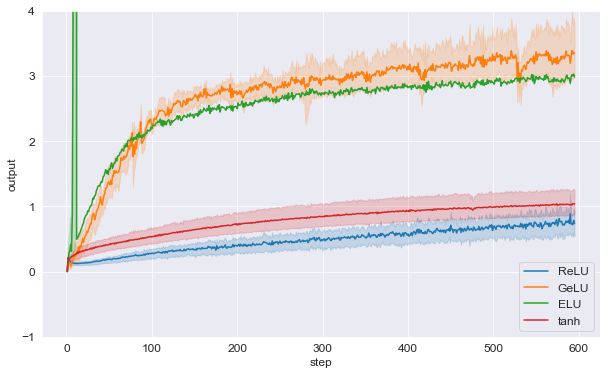

In [19]:
plt.figure(figsize=FIGSIZE)
plt.ylim(-1, 4)
for activation in ACT_KEY_TO_NAME.keys():
    plot_metric_vs_time_std(step_res[activation][L][WIDTH], metric='all_outputs', metric_name='output',
                            time='step', mode='training', marker='.', label=ACT_KEY_TO_NAME[activation])
set_figure_fontsizes(fontsize=FONTSIZE)
plt.show()

## Test accuracies

In [13]:
test_accuracies = {activation: [results[activation][L][WIDTH][idx]['test'][0]['accuracy'] 
                                for idx in range(N_TRIALS)] 
                   for activation in ACT_KEY_TO_NAME.keys()}
test_accuracies

{'relu': [0.0957999974489212,
  0.11349999904632568,
  0.147599995136261,
  0.11559999734163284,
  0.09799999743700027],
 'gelu': [0.8963000178337097,
  0.9617999792098999,
  0.9557999968528748,
  0.9616000056266785,
  0.9537000060081482],
 'elu': [0.9351999759674072,
  0.09799999743700027,
  0.9506999850273132,
  0.9656999707221985,
  0.9671000242233276],
 'tanh': [0.9401999711990356,
  0.9641000032424927,
  0.9269000291824341,
  0.9624000191688538,
  0.9416000247001648]}

In [14]:
for activation in ACT_KEY_TO_NAME.keys():
    print(activation, np.mean(test_accuracies[activation]))

relu 0.1140999972820282
gelu 0.9458400011062622
elu 0.7833399906754493
tanh 0.9470400094985962
